# CSCI3330 Tutorial 2: Image Processing Basics in Python

# Basic Image Manipulation & I/O in Python

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

Define a function to display images.

In [ ]:
def show_image(image, title='Image', cmap_type='gray'):
    plt.imshow(image, cmap=cmap_type)
    plt.title(title)
    plt.axis('off')
    plt.colorbar()

In [ ]:
from PIL import Image
def save_ndarray_as_image(ndarray, path):
    Image.fromarray(ndarray).save(path)

In [ ]:
def dump_var(var, name=""):
  print(f'[{name}] shape={var.shape}, dtype={var.dtype}, min={np.min(var)}, max={np.max(var)}.')

scikit-image data module provides some images for testing, e.g., coffee_image and coins_image.

In [ ]:
from skimage import data
image_cat = data.cat()
image_moon = data.moon()

[image_cat] shape=(300, 451, 3), dtype=uint8, min=0, max=231.
<class 'numpy.ndarray'>


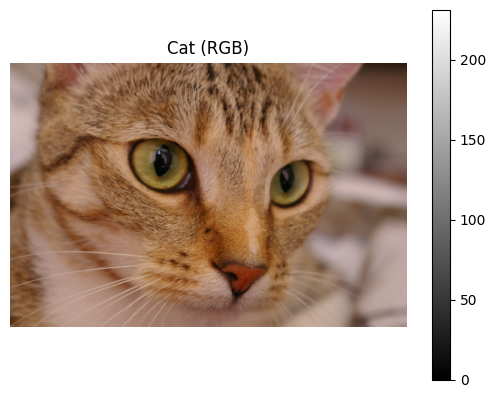

In [ ]:
dump_var(image_cat, name="image_cat")
show_image(image_cat, title='Cat (RGB)')

print(type(image_cat))

In [ ]:
dump_var(image_moon, name="image_moon")
show_image(image_moon / 5, title='Moon (Grayscale)')

[image_moon] shape=(512, 512), dtype=uint8, min=0, max=255.


In [ ]:
print(image_moon) # uint8 : unsigned integer (8-bit) 0 - 255

[[116 116 122 ...  93  96  96]
 [116 116 122 ...  93  96  96]
 [116 116 122 ...  93  96  96]
 ...
 [109 109 112 ... 117 116 116]
 [114 114 113 ... 118 118 118]
 [114 114 113 ... 118 118 118]]


In [ ]:
dump_var(image_cat, name="image_cat")
image_cat_bright = np.clip(image_cat + 20, 0, 255)
dump_var(image_cat_bright, name="image_cat_bright")
show_image(image_cat_bright, title='Cat (Bright)')

[image_cat] shape=(300, 451, 3), dtype=uint8, min=0, max=231.
[image_cat_bright] shape=(300, 451, 3), dtype=uint8, min=20, max=251.


In [ ]:
image_cat_bright2 = np.clip(image_cat + 50, 0, 255)
dump_var(image_cat_bright2, name="image_cat_bright2") # overflowed!

[image_cat_bright2] shape=(300, 451, 3), dtype=uint8, min=0, max=255.


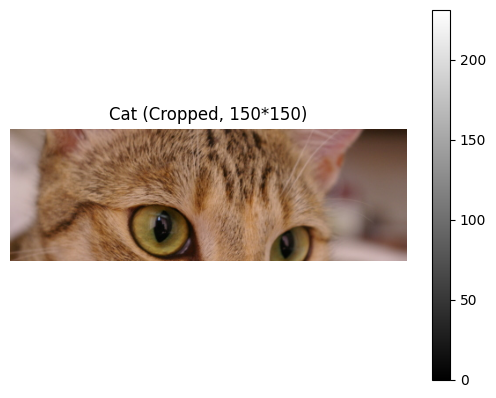

In [ ]:
# my crop
show_image(image_cat[0: 150][ 0: 150][ :], 'Cat (Cropped, 150*150)')
# show_image(image_cat[0: 150, 0: 150, :], 'Cat (Cropped, 150*150)')

In [ ]:
def norm(x):
  """
  Map the value range of input to [0, 1]
  """
  x = x.astype(np.float32)
  x -= np.min(x)
  x /= np.max(x)
  return x

def to_float(x):
  x = x.astype(np.float32)
  x = x / 255
  return x

# dump_var(image_cat, name="image_cat")
image_cat_norm = norm(image_cat)
# dump_var(image_cat_norm, name="image_cat")
show_image(image_cat_norm, title='Cat (Grayscale, Norm)')




### Flipping out

Using the NumPy methods `flipud()` and `fliplr()`, flip the image horizontally and vertically. Then display the corrected image using the `show_image()` function.

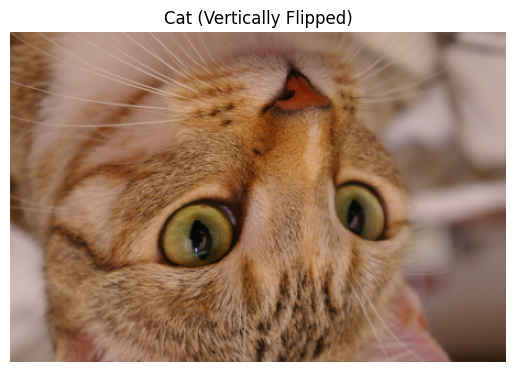

In [ ]:
# Flip the image vertically
image_cat_vertical_clip = np.flipud(image_cat)

# Flip the previous image horizontally
image_cat_horizontal_flip = np.fliplr(image_cat_vertical_clip)

# Show the resulting image
show_image(image_cat_vertical_clip, 'Cat (Vertically Flipped)')

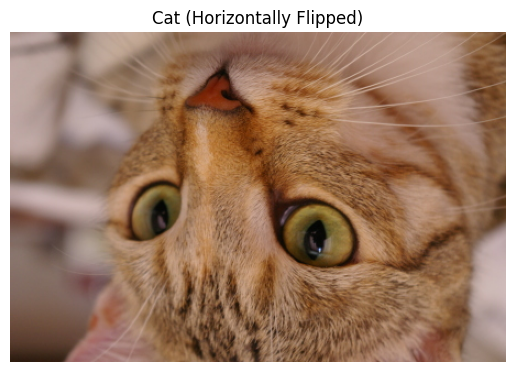

In [ ]:
show_image(image_cat_horizontal_flip, 'Cat (Horizontally Flipped)')

### Cropping

In [ ]:
show_image(image_cat, 'Cat')

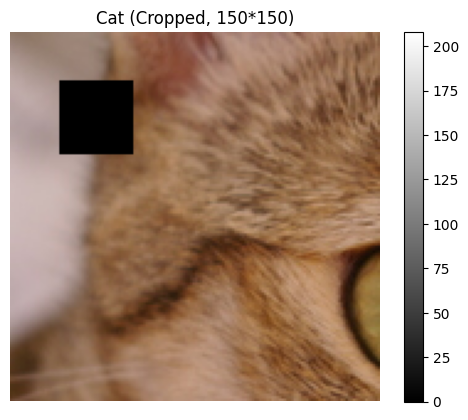

In [ ]:
# show_image(image_cat[0: 150][ 0: 150][ :], 'Cat (Cropped, 150*150)')
show_image(image_cat[0: 150, 0: 150, :], 'Cat (Cropped, 150*150)')

In [ ]:
image_cat_to_save = image_cat[0: 150][0: 150][ :]
image_cat_to_save[20:50, 20:50, :] = 0

save_ndarray_as_image(image_cat[0: 150, 0: 150, :], './cat_saved.png')
!pwd

/content


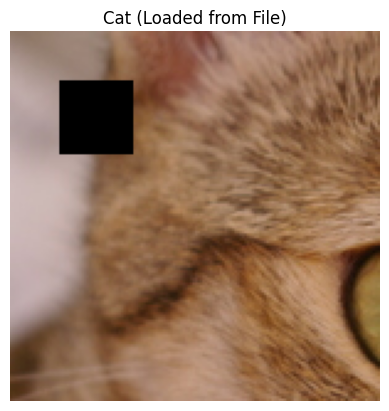

In [ ]:
image_cat_loaded_from_file = Image.open('./cat_saved.png')
show_image(image_cat_loaded_from_file, 'Cat (Loaded from File)')

### Histograms
In this part, you will analyze the amount of red in the image.

Extracting information from images is a fundamental part of image enhancement. This way you can balance the red and blue to make the image look colder or warmer.

You will use `hist()` to display the 256 different intensities of the red color. And `ravel()` to make these color values an array of one flat dimension.

(0.0, 255.0)

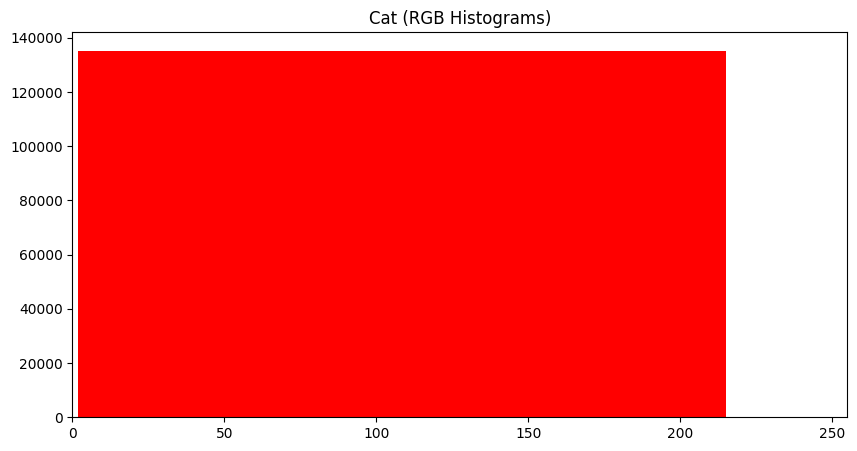

In [ ]:
# Obtain the red channel
image_cat_red_channel = image_cat[:, :, 0]
# Plot the histogram with bins in a range of 256
plt.figure(figsize=(10, 5))
plt.hist(image_cat_red_channel.ravel(), bins=1, color='red')
plt.title('Cat (RGB Histograms)')
plt.xlim(0, 255)

In [ ]:
# Obtain all the three channels
image_cat_red_channel = image_cat[:, :, 0]
image_cat_green_channel = image_cat[:, :, 1]
image_cat_blue_channel = image_cat[:, :, 2]
# Plot the the histogram with bins in a range of 256
plt.figure(figsize=(10, 5))
plt.hist(image_cat_red_channel.ravel(), bins=256, color='red')
plt.hist(image_cat_green_channel.ravel(), bins=256, color='green')
plt.hist(image_cat_blue_channel.ravel(), bins=256, color='blue')
plt.title('Cat (RGB Histograms)')
plt.xlim(0, 255)

(0.0, 255.0)

In [ ]:
# image_cat_red_channel = image_cat[:, :, :]
# Plot the the red histogram with bins in a range of 256
plt.figure(figsize=(10, 5))
plt.hist(image_cat.ravel(), bins=256, color='black');
plt.title('Cat (Combined Histogram)');

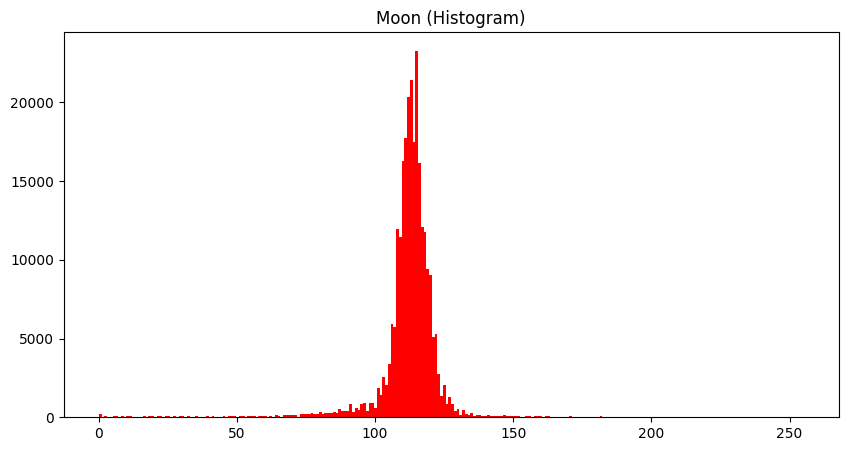

In [ ]:
# Plot the the red histogram with bins in a range of 256
plt.figure(figsize=(10, 5))
plt.hist(image_moon.ravel(), bins=256, color='red')
# .ravel() / .flatten() for removing the shape information
plt.title('Moon (Histogram)');


# [*` Thresholding`*]()
  - Partitioning an image into a foregraound and background
  - By making it black and white
  - Simplest method of image segmentation

## Apply global thresholding
In this part, you'll transform a photograph to binary so you can separate the foreground from the background.

To do so, you need to import the required modules, load the image, obtain the optimal thresh value using `threshold_otsu()` and apply it to the image.

You'll see the resulting binarized image when using the `show_image()` function, previously explained.

##[*`Approach 1: just use a simple constant comparison`*]()

In [ ]:
from skimage import color
# Make the image grayscale using rgb2gray
print('dtype for image_cat: ', image_cat.dtype)
image_cat_gray = color.rgb2gray(image_cat)
print('dtype for image_cat_gray: ', image_cat_gray.dtype)
print('maximum for image_cat_gray: ', np.max(image_cat_gray))
# Apply thresholding to the image
image_cat_binary_0 = image_cat_gray < 0.2
# print(image_cat_binary_0.dtype)
# Show the image
show_image(image_cat_binary_0, 'Cat (Binary image, Naive)')

dtype for image_cat:  uint8
dtype for image_cat_gray:  float64
maximum for image_cat_gray:  0.7556109803921569


## [*`Approach 2: otsu: find the const with max variance`*]()

In [1]:
from skimage.filters import threshold_otsu
# Make the image grayscale using rgb2gray
image_cat_gray = color.rgb2gray(image_cat)
# Obtain the optimal threshold value with otsu
thresh = threshold_otsu(image_cat_gray)
# Apply thresholding to the image
image_cat_binary_1 = image_cat_gray < thresh
# Show the image
show_image(image_cat_binary_1, 'Cat (Binary Image, Otsu)')

NameError: name 'color' is not defined

In [ ]:
image_cat_binary_2 = image_cat_gray > thresh
show_image(image_cat_binary_2, 'Cat (Binary Image Inverted, Otsu)')

## [*`other methods`*]()

> Indented block



In [ ]:
from skimage.filters import try_all_threshold

# Turn the fruits_image to grayscale
image_cat_gray = color.rgb2gray(image_cat)

# Use the try all method on the resulting grayscale image
fig, ax = try_all_threshold(image_cat_gray, verbose=False);

# [*` Noise & Image Filtering`*]()

- Add artificial noises.
- Remove noises using different image filters.

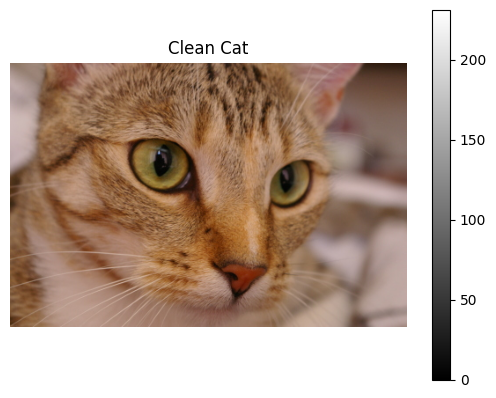

In [ ]:
show_image(image_cat, 'Clean Cat')

## [*` add gaussian noise`*]()

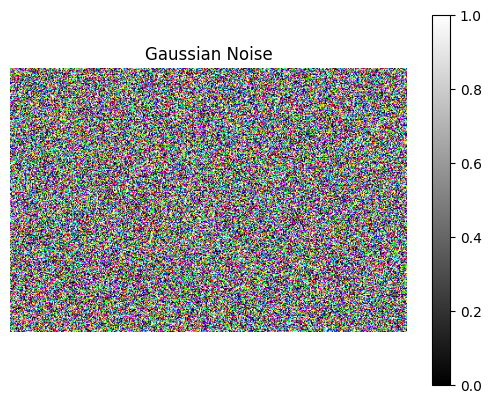

In [ ]:
sigma = 50
gaussian_noise = np.random.normal(loc=0.0, scale=sigma, size=(image_cat.shape))
show_image(gaussian_noise, 'Gaussian Noise')  # Normalized for visualization

In [ ]:
print('Max value in original cat image: ', np.max(image_cat))

Max value in original cat image:  231


In [ ]:
noisy_cat = np.clip((image_cat + gaussian_noise) / 255.0, 0, 1)
show_image(noisy_cat, 'Noisy Cat')
print('Max value in the noisy cat image (float): ', np.max(noisy_cat))

Max value in the noisy cat image (float):  1.0


## [*` approach1: guassian filter`*]()

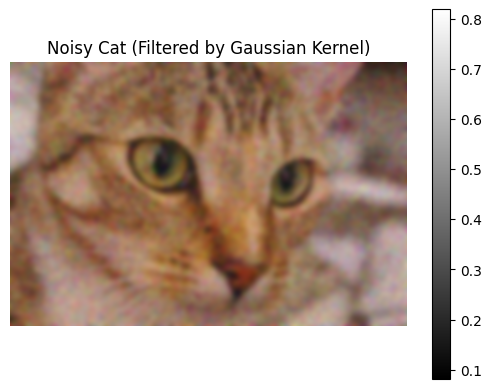

In [ ]:
import skimage
# :) Note that you should not finish your homework by import third-party packages
gaussian_filtered_noisy_cat = skimage.filters.gaussian(noisy_cat, sigma=3)
show_image(gaussian_filtered_noisy_cat, 'Noisy Cat (Filtered by Gaussian Kernel)')

## [*` approach2: median filter`*]()

In [ ]:
median_filtered_noisy_cat = skimage.filters.median(noisy_cat)
show_image(median_filtered_noisy_cat, 'Noisy Cat (Median Filtered)')

## [*` approach2: bilateral filter`*]()

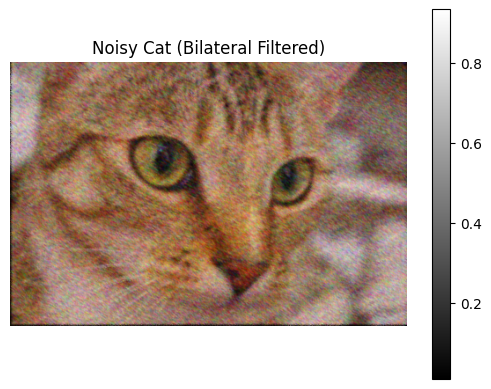

In [ ]:
bilateral_filtered_noisy_cat = skimage.restoration.denoise_bilateral(noisy_cat, channel_axis=-1)
show_image(bilateral_filtered_noisy_cat, 'Noisy Cat (Bilateral Filtered)')

Then, we will breifly introduce the homework 1.

Thank you!